# Limitations of the entropy measure in n-gram language modelling (CLIN32)

#### by Michael Bauwens

This demo accompanies the poster presentation "Limitations of the entropy measure in n-gram language modelling", presented by Michael Bauwens (UCLL Research & Expertise). It provides the functionality to:
- import data (default: Jane Austen's "Emma")
- train a trigram language model on this dataset
- compute the probabilities of every sentence in the dataset
- score every sentence with a variety of entropy measures
- explore the correlations between entropy measures
- retrieve the most probable sentences (low entropy) based on every measure

## Import required modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from tools import *
from nltk import download
from nltk.corpus import gutenberg

## Import the data

As toy example, we'll use Jane Austen's "Emma" (provided by the Gutenberg project via NLTK).

In [ ]:
download('gutenberg')
data = [[w.lower() for w in s] for s in gutenberg.sents('austen-emma.txt')]

: 

If you want to try this notebook with your own dataset, you can provide the text files. The function `import_data` _should_ transform the data into the correct format for the language modelling (a list of sentences). Currently the function is configured to support Dutch and English via the `lang` parameter. Should you require a different language, you can adapt the function (for language supported in spaCy v3, see [spacy.io/languages](https://spacy.io/languages)).

In [ ]:
# data = import_data("/directory/of/the/files", lang="en")

## Train the language model

We'll use a trigram statistical language model, using a vocabulary with cutoff 2. We're using the standard language model and not a model with any smoothing (e.g. Kneser-Ney Interpolated smoothing) because we'll just evaluate the probability of sentences within the corpus *itself*.

In [7]:
lm = train_lm(data, cutoff=2)

With cutoff 2, the amount of <UNK> tokens is 1615.


## Compute probabilities for every sentence

For every sentence we'll compute the raw probabilities and store them in a dictionary together with the string version of the sentence and a list of the trigrams in the sentence. Additionally, we'll create a frequency distribution of the trigrams in the dataset which we'll need for the frequency weighting later on. 

In [9]:
fdist, sent_dict = populate_dicts(data, lm)

You can explore the sentence probabilities using the `get_random_sample(sent_dict)` function.

In [20]:
get_random_sample_prob(sent_dict)

Random sample of a sentence with its probabilities

Sentence (#2205): mvg lien vanderweghen

Trigrams: [('<s>', '<s>', 'mvg'), ('<s>', 'mvg', 'lien'), ('mvg', 'lien', 'vanderweghen'), ('lien', 'vanderweghen', '</s>'), ('vanderweghen', '</s>', '</s>')]

Probabilities: [0.02400548696844993, 0.14285714285714285, 0.391304347826087, 0.7616822429906542, 1.0]




## Calculate entropy measures

For each sentence, we add the different entropy measures to the dictionary as well as some additional information (sentence length, percentage of trigrams with low relative frequency, and percentage of trigrams with perfect probability).
Entropy measures:
- Shannon entropy
- Length normalised Shannon entropy
- Shannon entropy via Shannon-McMillan-Breiman theorem
- Relative frequency weighted Shannon entropy
- Length normalised relative frequency weighted Shannon entropy

The dictionary is then transformed into a Pandas dataframe.

In [ ]:
for sent_id in sent_dict:
    sent_dict[sent_id] = entropy_measures(sent_dict[sent_id], fdist, lm, quiet=True)
    
df = pd.DataFrame.from_dict(sent_dict, orient='index')

Check out some random samples.

In [32]:
get_random_sample_ent(df)

Sentence: "kunnen jullie mij misschien wat meer informatie geven over mijn pakketje en wanneer ik het zou kunnen ontvangen ?"
Sentence length (in trigrams): 21
Percentage of low trigram relfreq (count<4): 29%
Percentage of perfect probability: 10%
Shannon entropy: 6.5201
Shannon entropy (length normalised): 0.3105
Shannon-McMillan-Breiman entropy (~ length normalised): 2.1489
Shannon entropy (relative frequency weighted): 0.0021
Shannon entropy (length normalised + relfreq weighted): 0.0001



Now we'll investigate how the different measures relate to one another in terms of correlation.

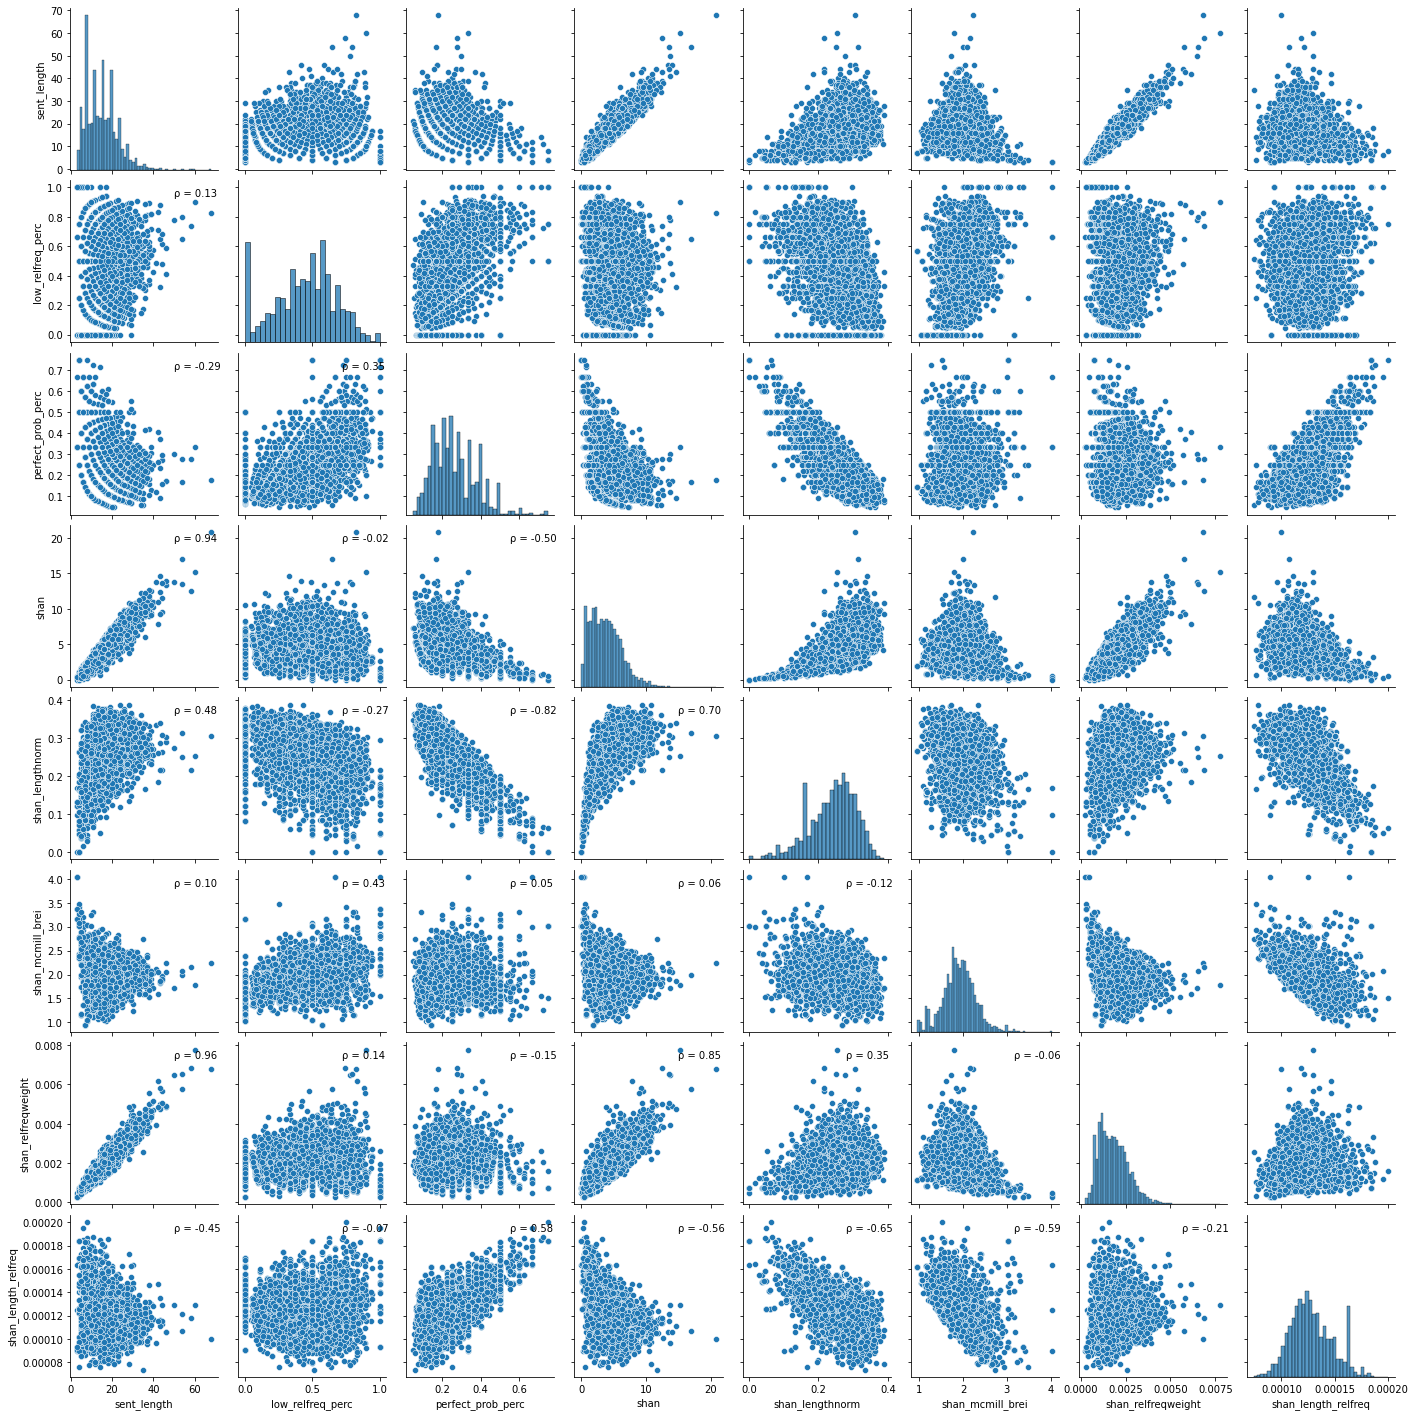

In [34]:
get_corr_pairplot(df)

In [42]:
df.sort_values(by=['shan']).head(10)

,text,trigrams,prob_list,sent_length,low_relfreq_perc,perfect_prob_perc,shan,shan_lengthnorm,shan_mcmill_brei,shan_relfreqweight,shan_length_relfreq
2565,fictieve naam,"[(<s>, <s>, fictieve), (<s>, fictieve, naam), ...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,0.500000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
505,202144-815 .,"[(<s>, <s>, 202144-815), (<s>, 202144-815, .),...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,0.500000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
208,gert verhulst,"[(<s>, <s>, gert), (<s>, gert, verhulst), (ger...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,1.000000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
2844,bob beelen,"[(<s>, <s>, bob), (<s>, bob, beelen), (bob, be...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,1.000000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
3655,jolien heylen,"[(<s>, <s>, jolien), (<s>, jolien, heylen), (j...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,1.000000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
381,fleur jacobs,"[(<s>, <s>, fleur), (<s>, fleur, jacobs), (fle...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,0.750000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
1909,verstraeten l.,"[(<s>, <s>, verstraeten), (<s>, verstraeten, l...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,1.000000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
3444,john doe,"[(<s>, <s>, john), (<s>, john, doe), (john, do...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,0.500000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
2496,alex ringvoet,"[(<s>, <s>, alex), (<s>, alex, ringvoet), (ale...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,1.000000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184
589,axelle verbruggen,"[(<s>, <s>, axelle), (<s>, axelle, verbruggen)...","[0.00022862368541380886, 1.0, 1.0, 1.0]",4,1.000000,0.750000,0.002765,0.000691,3.023684,0.000735,0.000184


In [ ]:
df.sort_values(by=['shan_lengthnorm']).head(10)

In [ ]:
df.sort_values(by=['shan_length_relfreq']).head(10)

In [39]:
get_freq_counts(df, lm, fdist, 1756)

Trigram counts:
<s> <s> maar (20)
<s> maar dit (6)
maar dit pakketje (1)
dit pakketje heeft (1)
pakketje heeft al (1)
heeft al reeds (1)
al reeds een (2)
reeds een vertraging (1)
een vertraging van (6)
vertraging van 10 (3)
van 10 dagen (2)
10 dagen . (3)
dagen . </s> (5)
. </s> </s> (2748)

Unigram counts:
<s> (8748)
<s> (8748)
maar (329)
dit (349)
pakketje (312)
heeft (150)
al (447)
reeds (79)
een (1375)
vertraging (226)
van (406)
10 (282)
dagen (675)
. (2751)
</s> (8748)
</s> (8748)


Difference between Shannon entropy and length normalised relative frequency weighted Shannon entropy

Text(0, 0.5, 'Shannon entropy')

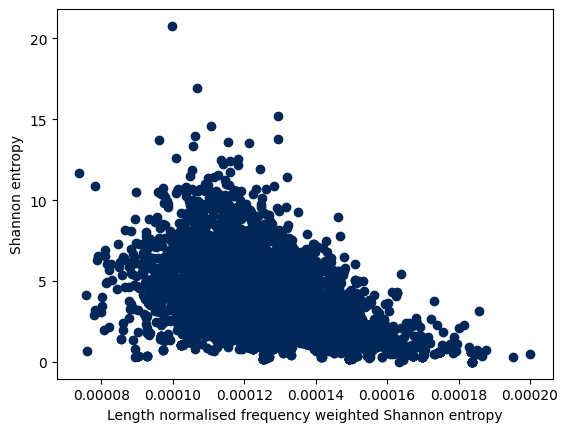

In [51]:
print(stats.pearsonr(df['shan_length_relfreq'], df['shan']))
plt.scatter(df['shan_length_relfreq'], df['shan'], color='#002757')
plt.xlabel("Length normalised frequency weighted Shannon entropy")
plt.ylabel("Shannon entropy")